In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

from scipy import stats
import statsmodels as sms

%matplotlib inline

In [2]:
Tel= pd.read_excel('Merged_data.xlsx')

In [3]:
Tel.head()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,Churn_Date,UPGRADE_DATE,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-11112345,Active,2001-11-27,NaT,2003-12-14,NaN,HN9000,Vars,Indirect,UNKNOWN,...,Broadband Remote,0,HN7000 Upgrade,2.0,1-5-1943,69,0,1,0.0,N
1,AMR-14837287,Active,2003-05-02,NaT,2006-08-08,Pro,HN7000S,Sales Agents,Indirect,NCC,...,Spaceway,0,Retail,2.0,28-12-1969,43,4,1,0.0,N
2,AMR-14837803,Active,2001-01-28,NaT,2004-03-17,Power150,HN9000,Call Center,Indirect,NCC,...,Broadband Remote,0,National Sales,2.0,20-7-1954,58,4,1,0.0,N
3,AMR-14837821,Active,2001-11-20,NaT,2005-03-27,Power150,DW6000,Sales Agents,Direct,NaN,...,Spaceway,0,Direct,NaN,10-5-1990,22,6,1,1.0,NaN
4,AMR-14839297,Active,2002-02-27,NaT,2004-06-14,Home,HN7000S,Call Center,Indirect,TAG,...,Broadband Remote,0,DW6000 Upgrade,1.0,11-5-1976,36,7,0,0.0,NaN


## Data Profiling

In [4]:
Tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 30 columns):
SITE_ACCOUNT_NUMBER          19998 non-null object
ACCOUNT_STATUS               19983 non-null object
FIRST_COMMUNICATION_DATE     19989 non-null datetime64[ns]
Churn_Date                   10000 non-null datetime64[ns]
UPGRADE_DATE                 19110 non-null datetime64[ns]
SERVICE_ PLAN                17278 non-null object
MODEL                        18613 non-null object
SALES_CHANNEL                14491 non-null object
DIRECT_INDIRECT_CHANNEL      19170 non-null object
SALES_SOURCE                 19016 non-null object
COMPANY_SOURCE_NAME          19980 non-null object
FIRST_NAME                   19972 non-null object
LAST_NAME                    19991 non-null object
ADDRESS                      19936 non-null object
CITY                         19998 non-null object
STATE                        19932 non-null object
ZIPCODE                      19932 non-null object


In [5]:
import pandas_profiling

C:\Users\hp\Anaconda2\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [6]:
pandas_profiling.ProfileReport(Tel)

Number of variables,30
Number of observations,19998
Total Missing (%),7.0%
Total size in memory,4.6 MiB
Average record size in memory,240.0 B
Numeric,2
Categorical,24
Date,3
Text (Unique),1
Rejected,0
Distinct count,4


In [80]:
Tel.isnull().any().sum()

28

In [81]:
Tel2=Tel[['ACCOUNT_STATUS','SERVICE_ PLAN','MODEL','SALES_CHANNEL','DIRECT_INDIRECT_CHANNEL','COMPANY_SOURCE_NAME','CITY','STATE','FEEDBACK','SATELLITE','GENDER','AGE','INCOME','MARITAL_STATUS','PRESENCE_OF_CHILDREN','COMPUTER_OWNER']]

In [82]:
Tel2 = Tel2.rename_axis({"SERVICE_ PLAN":'SERVICE_PLAN'}, 1)

In [83]:
Tel2.head()

,ACCOUNT_STATUS,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,COMPANY_SOURCE_NAME,CITY,STATE,FEEDBACK,SATELLITE,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,Active,NaN,HN9000,Vars,Indirect,HNS Customers,GERMANTOWN,MD,NaN,SPACEWAY3,2.0,69,0,1,0.0,N
1,Active,Pro,HN7000S,Sales Agents,Indirect,HNS Customers,WEST BERLIN,NJ,GOOD,HZN2-VER-4K,2.0,43,4,1,0.0,N
2,Active,Power150,HN9000,Call Center,Indirect,HNS Customers,MERRYVILLE,LA,BAD,SM5-VER-15K,2.0,58,4,1,0.0,N
3,Active,Power150,DW6000,Sales Agents,Direct,HNS Customers,ZANESVILLE,OH,NaN,SPACEWAY3,NaN,22,6,1,1.0,NaN
4,Active,Home,HN7000S,Call Center,Indirect,HNS Customers,CALLICOON,NY,GOOD,0,1.0,36,7,0,0.0,NaN


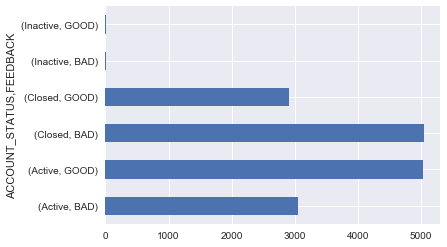

In [9]:
S = Tel2[['ACCOUNT_STATUS','FEEDBACK']].groupby(['ACCOUNT_STATUS','FEEDBACK']).size()
S.plot.barh()

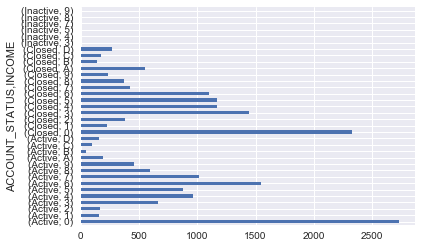

In [10]:
S = Tel2[['ACCOUNT_STATUS','INCOME']].groupby(['ACCOUNT_STATUS','INCOME']).size()
S.plot.barh()

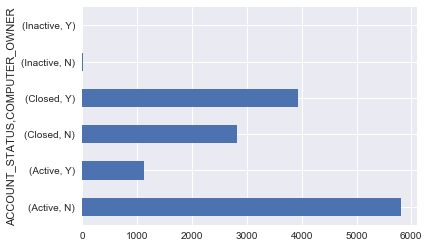

In [15]:
S = Tel2[['ACCOUNT_STATUS','COMPUTER_OWNER']].groupby(['ACCOUNT_STATUS','COMPUTER_OWNER']).size()
S.plot.barh()

In [84]:
cat=['ACCOUNT_STATUS','DIRECT_INDIRECT_CHANNEL','COMPUTER_OWNER','FEEDBACK','MARITAL_STATUS']

In [85]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [86]:
for c_feature in cat:
    Tel2 = create_dummies( Tel2, c_feature )

In [87]:
Tel2.head()

,SERVICE_PLAN,MODEL,SALES_CHANNEL,COMPANY_SOURCE_NAME,CITY,STATE,SATELLITE,GENDER,AGE,INCOME,PRESENCE_OF_CHILDREN,ACCOUNT_STATUS_Closed,ACCOUNT_STATUS_Inactive,DIRECT_INDIRECT_CHANNEL_Direct,DIRECT_INDIRECT_CHANNEL_Indirect,COMPUTER_OWNER_Y,FEEDBACK_GOOD,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_.
0,NaN,HN9000,Vars,HNS Customers,GERMANTOWN,MD,SPACEWAY3,2.0,69,0,0.0,0,0,0,1,0,0,1,0,0
1,Pro,HN7000S,Sales Agents,HNS Customers,WEST BERLIN,NJ,HZN2-VER-4K,2.0,43,4,0.0,0,0,0,1,0,1,1,0,0
2,Power150,HN9000,Call Center,HNS Customers,MERRYVILLE,LA,SM5-VER-15K,2.0,58,4,0.0,0,0,0,1,0,0,1,0,0
3,Power150,DW6000,Sales Agents,HNS Customers,ZANESVILLE,OH,SPACEWAY3,NaN,22,6,1.0,0,0,1,0,0,0,1,0,0
4,Home,HN7000S,Call Center,HNS Customers,CALLICOON,NY,0,1.0,36,7,0.0,0,0,0,1,0,1,0,0,0


In [92]:
Tel2.drop('ACCOUNT_STATUS_Inactive',axis =1 , inplace=True)

In [93]:
Tel2.drop('MARITAL_STATUS_.',axis =1 , inplace=True)

In [94]:
Tel3=Tel2[['ACCOUNT_STATUS_Closed','GENDER','INCOME','MARITAL_STATUS_1','MARITAL_STATUS_2','PRESENCE_OF_CHILDREN','DIRECT_INDIRECT_CHANNEL_Direct','COMPUTER_OWNER_Y','FEEDBACK_GOOD']]

In [95]:
Tel3.head()

,ACCOUNT_STATUS_Closed,GENDER,INCOME,MARITAL_STATUS_1,MARITAL_STATUS_2,PRESENCE_OF_CHILDREN,DIRECT_INDIRECT_CHANNEL_Direct,COMPUTER_OWNER_Y,FEEDBACK_GOOD
0,0,2.0,0,1,0,0.0,0,0,0
1,0,2.0,4,1,0,0.0,0,0,1
2,0,2.0,4,1,0,0.0,0,0,0
3,0,NaN,6,1,0,1.0,1,0,0
4,0,1.0,7,0,0,0.0,0,0,1


In [96]:
null_col=Tel3.columns[Tel3.isnull().any()].tolist()
null_col

[u'GENDER', u'INCOME', u'PRESENCE_OF_CHILDREN']

In [97]:
Tel3.INCOME.replace("A",11, inplace=True)

In [98]:
Tel3.INCOME.replace("B",12, inplace=True)

In [99]:
Tel3.INCOME.replace("C",13, inplace=True)

In [100]:
Tel3.INCOME.replace("D",14, inplace=True)

In [28]:
Tel3['INCOME'].value_counts()

0.0     5060
6.0     2648
4.0     2134
3.0     2109
5.0     2051
7.0     1436
8.0      976
11.0     744
9.0      698
2.0      552
14.0     430
1.0      384
13.0     278
12.0     181
Name: INCOME, dtype: int64

In [101]:
Tel3.isnull().any()

ACCOUNT_STATUS_Closed             False
GENDER                             True
INCOME                             True
MARITAL_STATUS_1                  False
MARITAL_STATUS_2                  False
PRESENCE_OF_CHILDREN               True
DIRECT_INDIRECT_CHANNEL_Direct    False
COMPUTER_OWNER_Y                  False
FEEDBACK_GOOD                     False
dtype: bool

In [102]:
Tel3.dropna(axis=0, how='any' ,inplace=True)

C:\Users\hp\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [103]:
Tel3.isnull().any()

ACCOUNT_STATUS_Closed             False
GENDER                            False
INCOME                            False
MARITAL_STATUS_1                  False
MARITAL_STATUS_2                  False
PRESENCE_OF_CHILDREN              False
DIRECT_INDIRECT_CHANNEL_Direct    False
COMPUTER_OWNER_Y                  False
FEEDBACK_GOOD                     False
dtype: bool

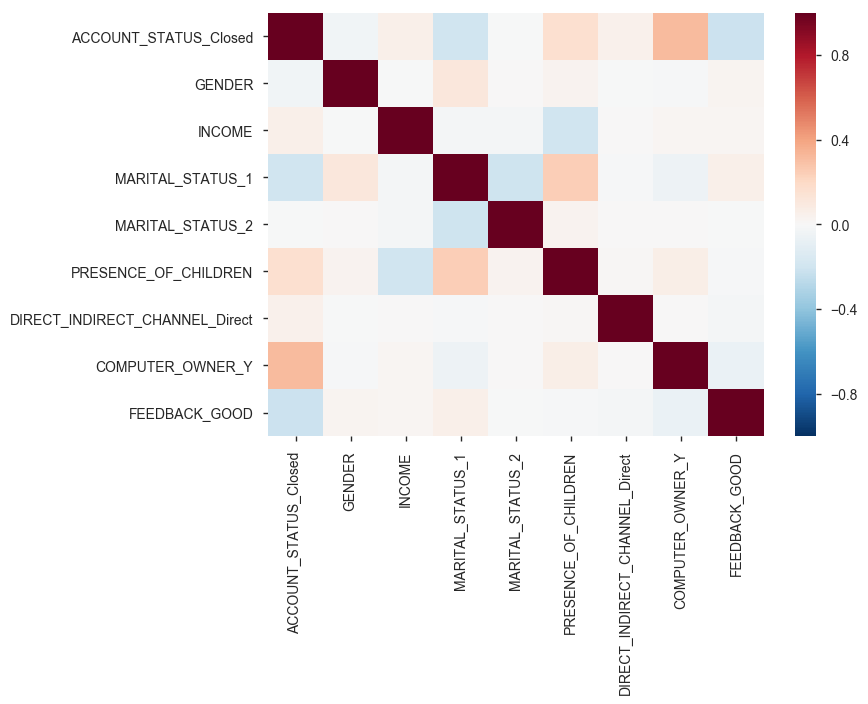

In [104]:
sns.heatmap(Tel3.corr())

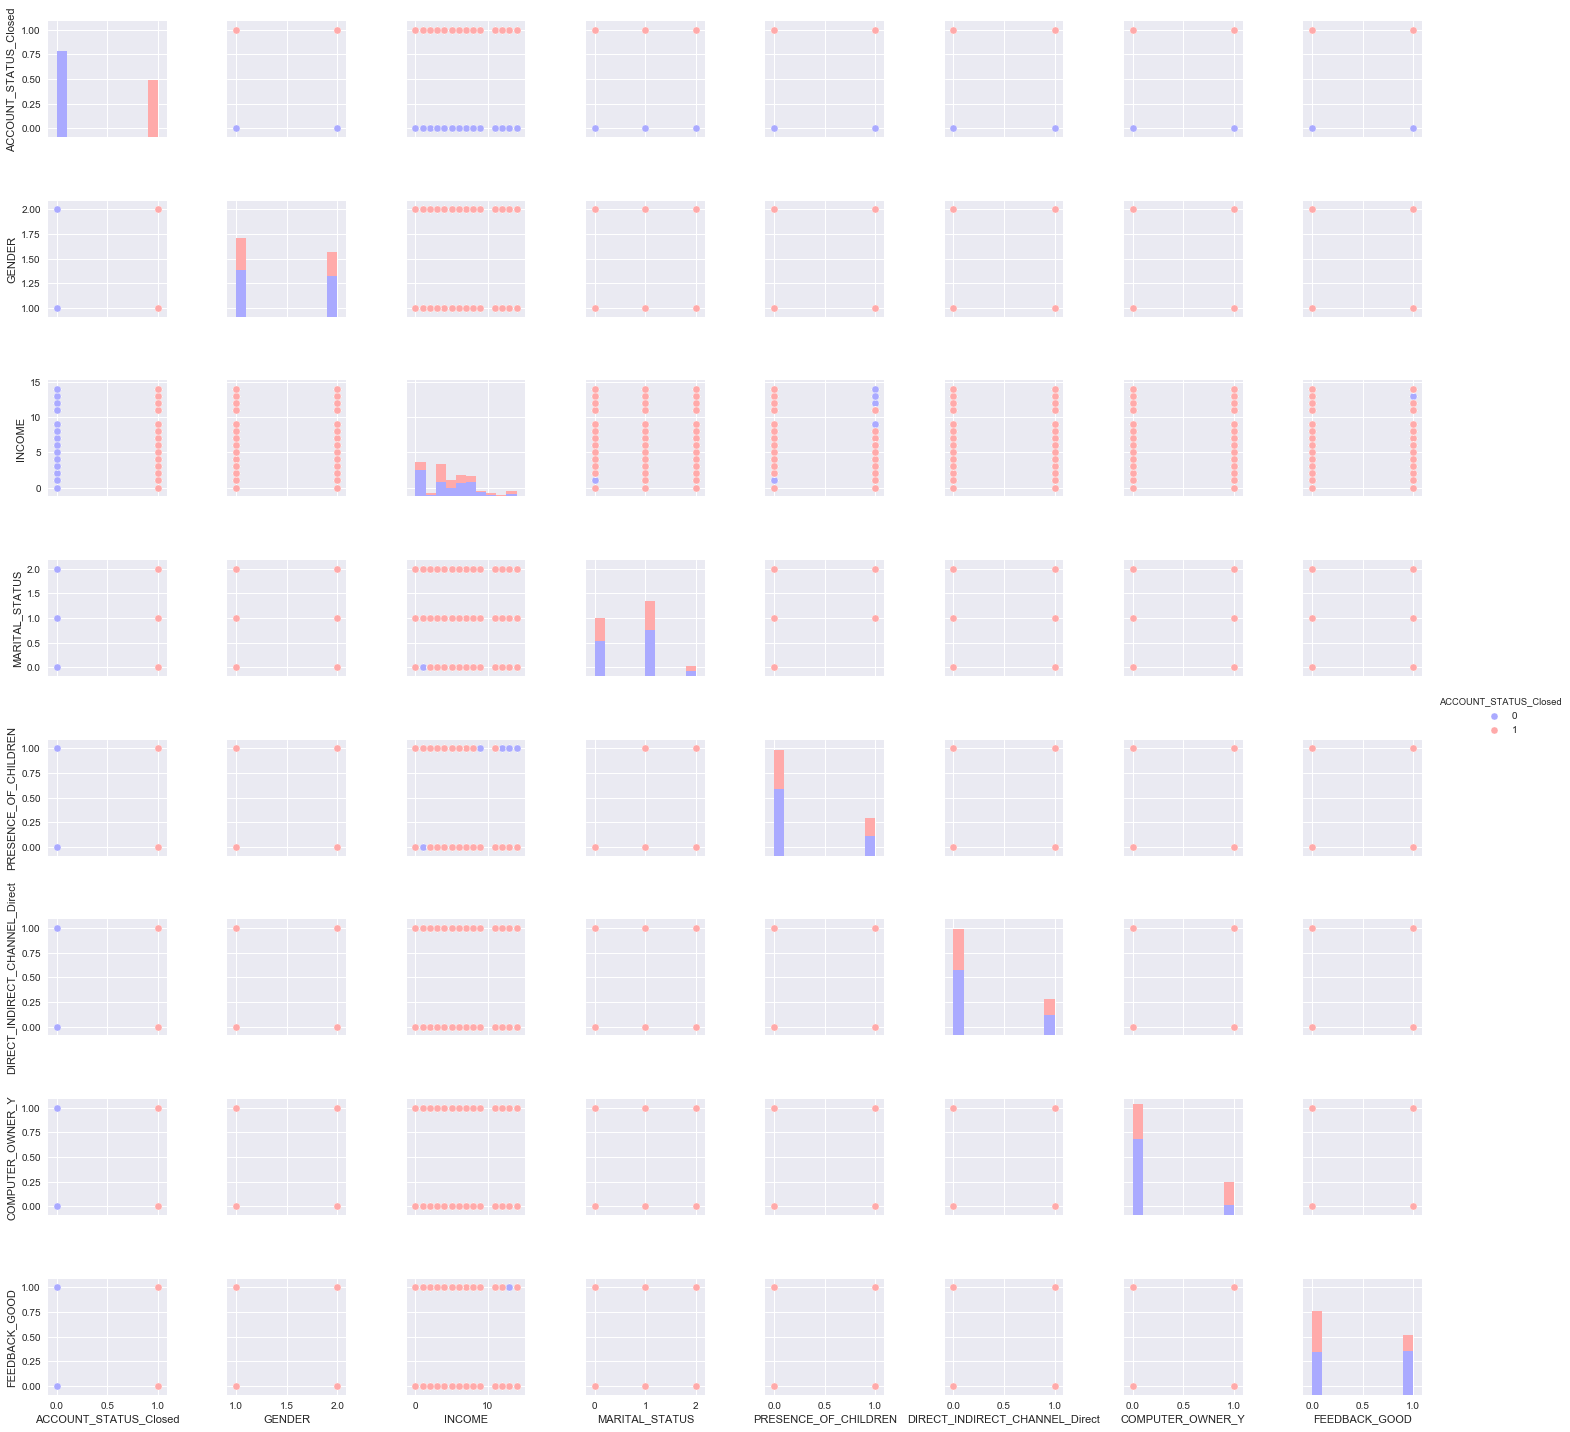

In [106]:
sns.pairplot(Tel3,hue='ACCOUNT_STATUS_Closed',palette='bwr')

In [105]:
Y= Tel3['ACCOUNT_STATUS_Closed']


In [107]:
X=Tel3[['GENDER','INCOME','MARITAL_STATUS_1','MARITAL_STATUS_2','PRESENCE_OF_CHILDREN','DIRECT_INDIRECT_CHANNEL_Direct','COMPUTER_OWNER_Y','FEEDBACK_GOOD']]

In [108]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split( X,Y,
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [112]:
print train_X.shape
print train_y.shape
print test_X.shape
print test_y.shape

(12176, 8)
(12176L,)
(3045, 8)
(3045L,)


In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
logmodel = LogisticRegression()
logmodel.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [113]:
predictions = logmodel.predict(test_X)

In [114]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(test_y,predictions))

             precision    recall  f1-score   support

          0       0.69      0.71      0.70      1499
          1       0.71      0.70      0.70      1546

avg / total       0.70      0.70      0.70      3045



In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
print(confusion_matrix(test_y,predictions))

[[1066  433]
 [ 470 1076]]


In [118]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [122]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [123]:
grid.fit(train_X,train_y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ....... kernel=rbf, C=0.1, gamma=1, score=0.766502, total=   3.9s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV] ....... kernel=rbf, C=0.1, gamma=1, score=0.750616, total=   4.2s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.7s remaining:    0.0s


[CV] ....... kernel=rbf, C=0.1, gamma=1, score=0.763677, total=   3.8s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ..... kernel=rbf, C=0.1, gamma=0.1, score=0.749015, total=   3.6s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ..... kernel=rbf, C=0.1, gamma=0.1, score=0.725727, total=   3.6s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ..... kernel=rbf, C=0.1, gamma=0.1, score=0.752587, total=   3.7s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV] .... kernel=rbf, C=0.1, gamma=0.01, score=0.723645, total=   4.7s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV] .... kernel=rbf, C=0.1, gamma=0.01, score=0.719566, total=   4.7s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV] .... kernel=rbf, C=0.1, gamma=0.01, score=0.713652, total=   4.6s
[CV] kernel=rbf, C=0.1, gamma=0.001 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 18.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [125]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [126]:
grid_predictions = grid.predict(test_X)

In [127]:
print(confusion_matrix(test_y,grid_predictions))

[[1155  344]
 [ 362 1184]]


In [128]:
print(classification_report(test_y,grid_predictions))

             precision    recall  f1-score   support

          0       0.76      0.77      0.77      1499
          1       0.77      0.77      0.77      1546

avg / total       0.77      0.77      0.77      3045

